# TreeBinning: Feature Demonstration

This notebook demonstrates the key features of the `TreeBinning` class from the binlearn library.

## Key Features Covered:
- Basic binning with classification and regression tasks
- Working with pandas DataFrames and numpy arrays
- Decision tree parameter customization
- Sklearn pipeline integration
- Parameter serialization and reconstruction
- Edge case handling

## Overview
`TreeBinning` uses decision tree splits to create bins optimized for prediction tasks, making it ideal for:
- **Target-optimized feature engineering**
- **Classification and regression preprocessing**
- **Automatic optimal boundary detection**
- **Complex feature-target relationships**

## 1. Setup and Data Preparation

In [20]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_regression
from binlearn.methods import TreeBinning
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [21]:
# Create sample datasets
n_samples = 300

# 1. Classification dataset with clear decision boundaries
X_class, y_class = make_classification(
    n_samples=n_samples,
    n_features=3,
    n_informative=2,
    n_redundant=1,
    n_classes=2,
    random_state=42
)
df_class = pd.DataFrame(X_class, columns=['feature_1', 'feature_2', 'feature_3'])
df_class['target'] = y_class

# 2. Regression dataset with non-linear relationships
X_reg, y_reg = make_regression(
    n_samples=n_samples,
    n_features=2,
    noise=0.1,
    random_state=42
)
df_reg = pd.DataFrame(X_reg, columns=['feature_a', 'feature_b'])
df_reg['target'] = y_reg

# 3. NumPy array for basic demonstration
array_data = np.column_stack([X_class[:, :2], y_class])

print(f"📊 Created datasets:")
print(f"   - Classification: {df_class.shape}")
print(f"   - Regression: {df_reg.shape}")
print(f"   - Array data: {array_data.shape}")
print("\n📈 Classification data preview:")
print(df_class.describe().round(2))

📊 Created datasets:
   - Classification: (300, 4)
   - Regression: (300, 3)
   - Array data: (300, 3)

📈 Classification data preview:
       feature_1  feature_2  feature_3  target
count     300.00     300.00     300.00   300.0
mean       -0.01      -0.03       0.04     0.5
std         0.27       1.21       1.20     0.5
min        -0.57      -2.67      -2.71     0.0
25%        -0.23      -1.03      -0.96     0.0
50%         0.00      -0.01       0.01     1.0
75%         0.21       0.95       1.05     1.0
max         0.88       3.95       2.62     1.0


## 2. Basic Binning Operations

In [22]:
# Basic classification binning
print("🎯 Basic TreeBinning Demonstration - Classification")
print("=" * 55)

# Create and fit binner using guidance_columns (binlearn style)
binner_class = TreeBinning(
    task_type='classification',
    guidance_columns=['target']
)
binner_class.fit(df_class)

# Transform data
binned_class = binner_class.transform(df_class[['feature_1', 'feature_2', 'feature_3']])

print(f"📊 Bin edges created:")
for col, edges in binner_class.bin_edges_.items():
    print(f"   {col}: {len(edges)-1} bins, edges: {np.round(edges, 2)}")

print(f"\n🔢 Binned data shape: {binned_class.shape}")
print(f"📈 Unique values per feature: {[len(np.unique(binned_class[:, i])) for i in range(binned_class.shape[1])]}")

🎯 Basic TreeBinning Demonstration - Classification
📊 Bin edges created:
   feature_1: 8 bins, edges: [-0.57 -0.28 -0.09 -0.08  0.02  0.03  0.08  0.21  0.88]
   feature_2: 8 bins, edges: [-2.67 -1.35 -0.47 -0.43  0.07  0.33  0.35  0.95  3.95]
   feature_3: 7 bins, edges: [-2.71 -2.41 -1.95 -1.89 -1.26 -1.18  1.1   2.62]

🔢 Binned data shape: (300, 3)
📈 Unique values per feature: [8, 8, 7]


In [23]:
# Basic regression binning using sklearn style
print("\n📈 TreeBinning - Regression Task")
print("=" * 40)

# Create and fit binner using sklearn-style interface
binner_reg = TreeBinning(task_type='regression')
binner_reg.fit(df_reg[['feature_a', 'feature_b']], df_reg['target'])

# Transform data
binned_reg = binner_reg.transform(df_reg[['feature_a', 'feature_b']])

print(f"📊 Bin edges created:")
for col, edges in binner_reg.bin_edges_.items():
    print(f"   {col}: {len(edges)-1} bins, edges: {np.round(edges, 2)}")

print(f"\n🔢 Binned data shape: {binned_reg.shape}")

# Demonstrate with numpy arrays
print(f"\n🔢 NumPy Array Support:")
binner_array = TreeBinning(task_type='classification', guidance_columns=[2])
binner_array.fit(array_data)
binned_array = binner_array.transform(array_data)
print(f"   Array shape: {array_data.shape} → {binned_array.shape}")
print(f"   Unique values: {len(np.unique(binned_array))}")


📈 TreeBinning - Regression Task
📊 Bin edges created:
   feature_a: 7 bins, edges: [-3.24 -1.72 -0.74  0.06  0.26  2.25  2.7   3.08]
   feature_b: 8 bins, edges: [-2.3  -1.96 -0.92 -0.42 -0.01  0.58  0.92  1.86  3.85]

🔢 Binned data shape: (300, 2)

🔢 NumPy Array Support:
   Array shape: (300, 3) → (300, 2)
   Unique values: 8


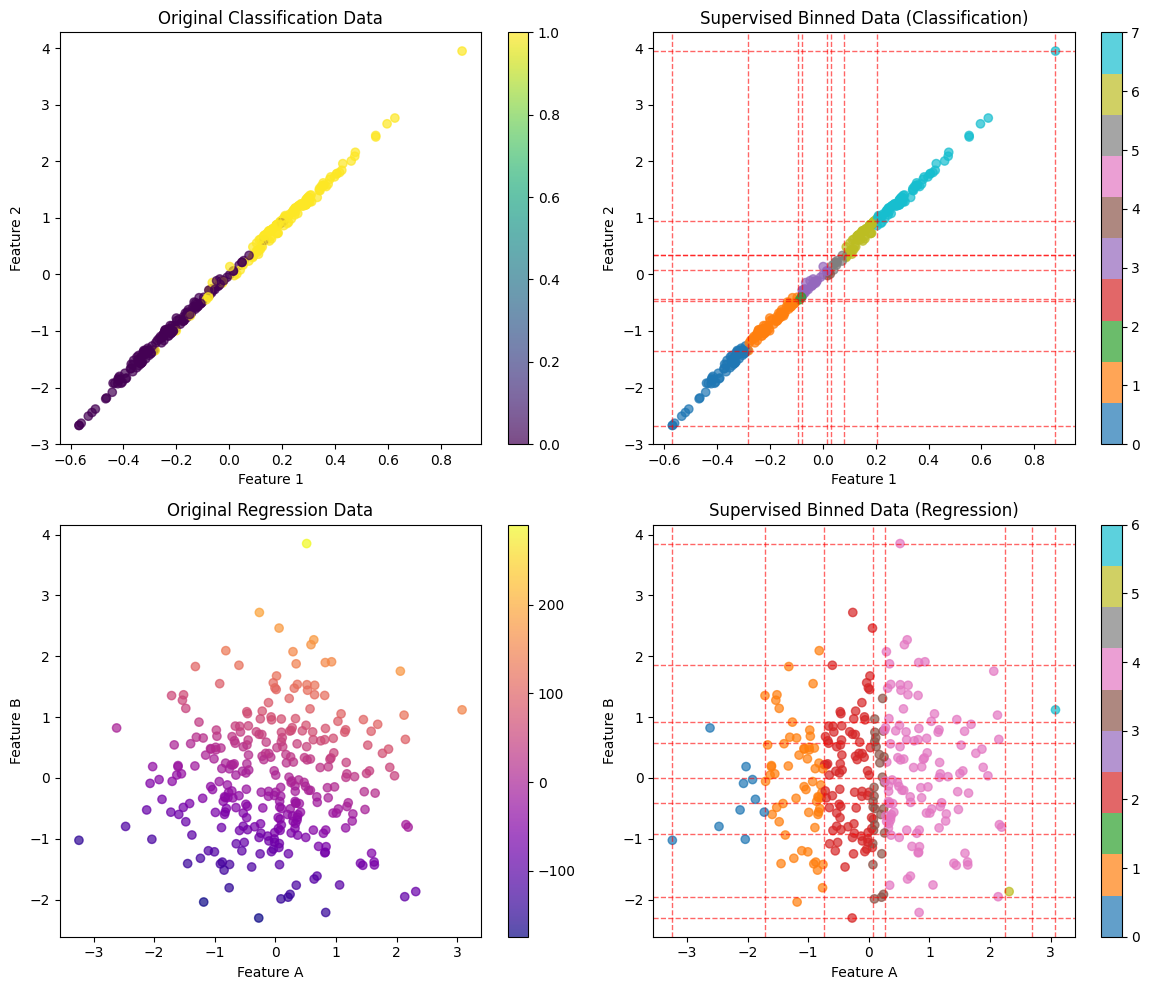

In [24]:
# Visualize binning results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Original classification data
scatter1 = ax1.scatter(df_class['feature_1'], df_class['feature_2'], 
                      c=df_class['target'], cmap='viridis', alpha=0.7)
ax1.set_title('Original Classification Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
plt.colorbar(scatter1, ax=ax1)

# Binned classification data with boundaries
binned_vis = binner_class.transform(df_class)
scatter2 = ax2.scatter(df_class['feature_1'], df_class['feature_2'], 
                      c=binned_vis[:, 0], cmap='tab10', alpha=0.7)

# Add bin boundaries for feature_1
for edge in binner_class.bin_edges_['feature_1']:
    ax2.axvline(edge, linestyle='--', alpha=0.6, color='red', linewidth=1)
for edge in binner_class.bin_edges_['feature_2']:
    ax2.axhline(edge, linestyle='--', alpha=0.6, color='red', linewidth=1)

ax2.set_title('Supervised Binned Data (Classification)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.colorbar(scatter2, ax=ax2)

# Original regression data
scatter3 = ax3.scatter(df_reg['feature_a'], df_reg['feature_b'], 
                      c=df_reg['target'], cmap='plasma', alpha=0.7)
ax3.set_title('Original Regression Data')
ax3.set_xlabel('Feature A')
ax3.set_ylabel('Feature B')
plt.colorbar(scatter3, ax=ax3)

# Binned regression data
binned_reg_vis = binner_reg.transform(df_reg[['feature_a', 'feature_b']])
scatter4 = ax4.scatter(df_reg['feature_a'], df_reg['feature_b'], 
                      c=binned_reg_vis[:, 0], cmap='tab10', alpha=0.7)

# Add bin boundaries
for edge in binner_reg.bin_edges_['feature_a']:
    ax4.axvline(edge, linestyle='--', alpha=0.6, color='red', linewidth=1)
for edge in binner_reg.bin_edges_['feature_b']:
    ax4.axhline(edge, linestyle='--', alpha=0.6, color='red', linewidth=1)

ax4.set_title('Supervised Binned Data (Regression)')
ax4.set_xlabel('Feature A')
ax4.set_ylabel('Feature B')
plt.colorbar(scatter4, ax=ax4)

plt.tight_layout()
plt.show()

## 3. Decision Tree Parameter Customization

In [25]:
# Demonstrate different tree parameter configurations
print("🌳 Tree Parameter Customization")
print("=" * 35)

# Test different tree configurations
tree_configs = {
    'Shallow (default)': {'max_depth': 3, 'min_samples_split': 2},
    'Deep': {'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 5},
    'Conservative': {'max_depth': 4, 'min_samples_split': 50, 'min_samples_leaf': 20}
}

for config_name, tree_params in tree_configs.items():
    print(f"\n🎯 {config_name} Configuration:")
    print(f"   Parameters: {tree_params}")
    
    # Create binner with custom tree parameters
    binner = TreeBinning(
        task_type='classification',
        tree_params=tree_params,
        guidance_columns=['target']
    )
    
    # Fit and analyze
    binner.fit(df_class)
    
    # Show resulting bin counts
    bin_counts = {col: len(edges)-1 for col, edges in binner.bin_edges_.items()}
    print(f"   Bins created: {bin_counts}")
    print(f"   Total bins: {sum(bin_counts.values())}")

🌳 Tree Parameter Customization

🎯 Shallow (default) Configuration:
   Parameters: {'max_depth': 3, 'min_samples_split': 2}
   Bins created: {'feature_1': 8, 'feature_2': 8, 'feature_3': 7}
   Total bins: 23

🎯 Deep Configuration:
   Parameters: {'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 5}
   Bins created: {'feature_1': 16, 'feature_2': 18, 'feature_3': 21}
   Total bins: 55

🎯 Conservative Configuration:
   Parameters: {'max_depth': 4, 'min_samples_split': 50, 'min_samples_leaf': 20}
   Bins created: {'feature_1': 8, 'feature_2': 7, 'feature_3': 8}
   Total bins: 23


## 4. Sklearn Pipeline Integration

In [26]:
# Demonstrate pipeline integration
print("🔗 Sklearn Pipeline Integration")
print("=" * 35)

# Split data for classification
X_train, X_test, y_train, y_test = train_test_split(
    df_class[['feature_1', 'feature_2', 'feature_3']], 
    df_class['target'], 
    test_size=0.3, 
    random_state=42
)

# Create pipeline with supervised binning and classification
pipeline = Pipeline([
    ('binner', TreeBinning(
        task_type='classification',
        tree_params={'max_depth': 4, 'min_samples_split': 20}
    )),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])

# Fit and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = (y_pred == y_test).mean()

print(f"✅ Pipeline trained successfully")
print(f"📊 Test accuracy: {accuracy:.3f}")
print(f"🔢 Features binned: {X_train.shape[1]}")

# Show bin edges from pipeline
binner_from_pipeline = pipeline.named_steps['binner']
print(f"\n📏 Bin edges created:")
for col, edges in binner_from_pipeline.bin_edges_.items():
    print(f"   {col}: {len(edges)-1} bins, edges: {np.round(edges, 2)}")

# Compare with unsupervised binning pipeline
from binlearn.methods import EqualWidthBinning

pipeline_unsupervised = Pipeline([
    ('binner', EqualWidthBinning(n_bins=5)),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])

pipeline_unsupervised.fit(X_train, y_train)
y_pred_unsupervised = pipeline_unsupervised.predict(X_test)
accuracy_unsupervised = (y_pred_unsupervised == y_test).mean()

print(f"\n📈 Comparison with EqualWidthBinning:")
print(f"   Supervised binning accuracy: {accuracy:.3f}")
print(f"   Unsupervised binning accuracy: {accuracy_unsupervised:.3f}")
print(f"   Improvement: {accuracy - accuracy_unsupervised:+.3f}")

🔗 Sklearn Pipeline Integration
✅ Pipeline trained successfully
📊 Test accuracy: 0.956
🔢 Features binned: 3

📏 Bin edges created:
   feature_1: 7 bins, edges: [-0.57 -0.15 -0.09 -0.03  0.08  0.2   0.21  0.63]
   feature_2: 9 bins, edges: [-2.67 -0.74 -0.47 -0.43 -0.16  0.16  0.35  0.94  0.97  2.76]
   feature_3: 9 bins, edges: [-2.71 -1.89 -1.56 -0.93 -0.62  0.26  0.47  1.57  1.73  2.62]

📈 Comparison with EqualWidthBinning:
   Supervised binning accuracy: 0.956
   Unsupervised binning accuracy: 0.967
   Improvement: -0.011


## 5. Parameter Serialization and Reconstruction

In [27]:
# Demonstrate serialization for model persistence
print("💾 Parameter Serialization & Reconstruction")
print("=" * 45)

# Create and fit original binner
original_binner = TreeBinning(
    task_type='classification',
    tree_params={'max_depth': 4, 'min_samples_split': 10},
    guidance_columns=['target']
)
original_binner.fit(df_class)
original_result = original_binner.transform(df_class)

# Serialize parameters
params = original_binner.get_params()
print(f"📋 Serialized parameters: {params}")

# Reconstruct binner from parameters
reconstructed_binner = TreeBinning(**params)

# Test reconstruction
reconstructed_result = reconstructed_binner.transform(df_class)
results_match = np.allclose(original_result, reconstructed_result)

print(f"\n🔍 Reconstruction verification:")
print(f"   ✅ Results identical: {results_match}")
print(f"   📊 Original shape: {original_result.shape}")
print(f"   📊 Reconstructed shape: {reconstructed_result.shape}")

# Test with new data (without refitting)
X_new, y_new = make_classification(
    n_samples=50, n_features=3, n_informative=2, 
    n_redundant=1, n_classes=2, random_state=123
)
df_new = pd.DataFrame(X_new, columns=['feature_1', 'feature_2', 'feature_3'])

test_result = reconstructed_binner.transform(df_new)
print(f"\n🔄 Transform new data without refitting:")
print(f"   ✅ Success: {test_result.shape}")
print(f"   🔢 Unique bins: {len(np.unique(test_result))}")

💾 Parameter Serialization & Reconstruction
📋 Serialized parameters: {'task_type': 'classification', 'tree_params': {'max_depth': 4, 'min_samples_split': 10}, 'clip': True, 'preserve_dataframe': False, 'guidance_columns': ['target'], 'bin_edges': {'feature_1': [-0.568330490777053, -0.28175197541713715, -0.27884550392627716, -0.0916861742734909, -0.07960990443825722, -0.02849573828279972, 0.017454328015446663, 0.03272566944360733, 0.08151660487055779, 0.20420484989881516, 0.20551689714193344, 0.8797771658350575], 'feature_2': [-2.6712235212608033, -1.348906934261322, -1.346912443637848, -0.467342808842659, -0.4299498498439789, -0.16414250433444977, 0.07019726559519768, 0.2711690068244934, 0.3346477746963501, 0.34615378081798553, 0.9441502690315247, 0.9520338177680969, 3.9473456936316174], 'feature_3': [-2.7127177683477672, -2.4147413969039917, -1.9533280730247498, -1.8855527639389038, -1.557865858078003, -1.2629939913749695, -1.180470049381256, -1.1501935124397278, 1.0961014032363892, 1.

## 6. Edge Cases and Robustness

In [28]:
# Test edge cases
print("⚠️ Edge Case Testing")
print("=" * 25)

# Create edge case datasets
edge_cases = {
    'Constant features': {
        'data': pd.DataFrame({
            'const': np.full(100, 42.0),
            'target': np.random.randint(0, 2, 100)
        }),
        'features': ['const'],
        'target': 'target'
    },
    'Small dataset': {
        'data': pd.DataFrame({
            'feature': [1.0, 2.0, 3.0],
            'target': [0, 1, 0]
        }),
        'features': ['feature'],
        'target': 'target'
    },
    'Perfect separation': {
        'data': pd.DataFrame({
            'feature': np.concatenate([np.ones(50), np.ones(50) * 10]),
            'target': np.concatenate([np.zeros(50), np.ones(50)])
        }),
        'features': ['feature'],
        'target': 'target'
    }
}

for case_name, case_info in edge_cases.items():
    print(f"\n🧪 Testing: {case_name}")
    try:
        binner = TreeBinning(
            task_type='classification',
            guidance_columns=[case_info['target']]
        )
        binner.fit(case_info['data'])
        result = binner.transform(case_info['data'][case_info['features']])
        
        print(f"   ✅ Success: {result.shape}")
        print(f"   📊 Unique bins: {len(np.unique(result))}")
        
        # Show bin edges
        for col, edges in binner.bin_edges_.items():
            print(f"   📏 {col} bins: {len(edges)-1}, range: [{edges[0]:.3f}, {edges[-1]:.3f}]")
        
    except Exception as e:
        print(f"   ❌ Failed: {str(e)}")

⚠️ Edge Case Testing

🧪 Testing: Constant features
   ✅ Success: (100, 1)
   📊 Unique bins: 1
   📏 const bins: 1, range: [42.000, 42.000]

🧪 Testing: Small dataset
   ✅ Success: (3, 1)
   📊 Unique bins: 3
   📏 feature bins: 3, range: [1.000, 3.000]

🧪 Testing: Perfect separation
   ✅ Success: (100, 1)
   📊 Unique bins: 2
   📏 feature bins: 2, range: [1.000, 10.000]


## 7. Summary and Best Practices

In [29]:
# Summary and recommendations
print("📝 TreeBinning Summary")
print("=" * 35)

recommendations = {
    "✅ Best for": [
        "Target-optimized feature engineering",
        "Classification and regression preprocessing",
        "Complex feature-target relationships",
        "Automatic optimal boundary detection"
    ],
    "⚠️ Use with caution": [
        "Very small datasets (risk of overfitting)",
        "When interpretability is more important than performance",
        "Datasets with no clear feature-target relationships"
    ],
    "💡 Tips": [
        "Start with shallow trees (max_depth=3-4) to avoid overfitting",
        "Use min_samples_split and min_samples_leaf for regularization",
        "Validate on holdout data to check for overfitting",
        "Compare with unsupervised methods to measure improvement"
    ]
}

for category, items in recommendations.items():
    print(f"\n{category}:")
    for item in items:
        print(f"  • {item}")

print(f"\n🎯 Key Features Demonstrated:")
features = [
    "Classification and regression task support",
    "Custom decision tree parameter configuration",
    "Both sklearn-style and binlearn-style interfaces",
    "Seamless sklearn pipeline integration",
    "Parameter serialization and model reconstruction",
    "Robust handling of edge cases and small datasets"
]

for i, feature in enumerate(features, 1):
    print(f"  {i}. {feature}")

print(f"\n✨ TreeBinning demonstration complete!")

📝 TreeBinning Summary

✅ Best for:
  • Target-optimized feature engineering
  • Classification and regression preprocessing
  • Complex feature-target relationships
  • Automatic optimal boundary detection

⚠️ Use with caution:
  • Very small datasets (risk of overfitting)
  • When interpretability is more important than performance
  • Datasets with no clear feature-target relationships

💡 Tips:
  • Start with shallow trees (max_depth=3-4) to avoid overfitting
  • Use min_samples_split and min_samples_leaf for regularization
  • Validate on holdout data to check for overfitting
  • Compare with unsupervised methods to measure improvement

🎯 Key Features Demonstrated:
  1. Classification and regression task support
  2. Custom decision tree parameter configuration
  3. Both sklearn-style and binlearn-style interfaces
  4. Seamless sklearn pipeline integration
  5. Parameter serialization and model reconstruction
  6. Robust handling of edge cases and small datasets

✨ TreeBinning demon